<a href="https://colab.research.google.com/github/kimheehyun/california_housing/blob/master/hw4_2(%EC%8A%A4%ED%84%B0%EB%94%94_%EB%B2%84%EC%A0%84).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# SelectKBes(score_func= ??? ,k=n ) 이용하여
# regression vs classifier
# univariant selection 하는 방법 이용할 때 쓰는 라이브러리
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


# Feature Importance Scoring
from sklearn.ensemble import ExtraTreesRegressor


In [57]:
data = fetch_california_housing()
df = pd.DataFrame(data["data"], columns=data["feature_names"])
df["MedHouseVal"] = data.target  # 타겟 변수 추가b

In [58]:
# data.target_names


univariate analysis: 한번에 하나의 특징에만 초점을 맞춰서 데이터 특성 분석방법. 목표는  "유용한 특징 (변수)를 고르는 것."

following technique
1) univariate selection with selectkbest class
=> selectkbest 를 사용하여 집값 예측에 가장 중요한 상위 k개의 특징을 선택하는 코드.
=> 내부적으로는 f_classif 같은 통계 기법을 써서 각 변수와. 목표 변수의 관련성을 계산한다.


# SelectKBest 에 chi2 를 쓰거나 f_regression을 쓸 수 있는데
# chi2(카이제곱)은 음수를 허용하지 않기 때문에 쓰려면 그 전에 x를 0~1 사이로
# 정규화 해야함.

# 근데 연속적인 숫자면 회귀 모델 (f_regression)을 써야함.
# 분류모델 - 기냐 아니냐  (카이제곱)에 넣으면 안됨.


In [59]:
##(1) SelectKBest를 이용한 특징 선택
X = df.drop(columns=["MedHouseVal"])  # 특징 - 타겟을 제외한 COLUMNS
y = df["MedHouseVal"]  # 타겟 변수



selector = SelectKBest(score_func=f_regression, k=3)  #집값 예측에 중요한 상위 3개 특징 선택
selector.fit(X,y)
X_selected=selector.transform(X)


# selector.fit_transform(X, y) 가 하는 일:
 위에 형성한 selector에대해 fit_transform 해줌.

 1) fit(X,y) : x의 컬럼,즉 피쳐가 타겟에 얼마나 관련 있는지 통계적으로 점수 계산.

 2) transform: 점수가 높은 순으로 피쳐 정렬 그 중 상위 k개만 남김.

selector.fit (X,y)
=> 피쳐(x) 점수 계산 /   보통 학습 데이터에만
+
X_selected = selector.transform(x)
=> 그 점수 (x)기준으로 상위 k 개만 선택.


In [60]:
# 선택된 특징 확인
#selector.get_support() : 특성 선택 객체에 .get_support 를 쓰면 불리언 배열이 나옴.
#  True-> feature 선택됨. False -> feature 버려짐.
#  그러니까 X.Columns 는 피처 데이터 프레임.
# 여기에 selector 를 통해서 선택된 것들을 남겨서 selected_features 에 넣는거임.
selected_features = X.columns[selector.get_support()]
# selector.get_support() 는 선택된 컬럼에 대한 true/false -> 뭐가 선택 되었는지가 저장된 "ARRAY"
# selector.transform(X) 는 선.택.된.  값.
# selected_features는== X의 컬럼 중 선택된 애들 TRUE FALSE 중 선택된 애들 골라낸거.

print("Top 3 Features using SelectKBest:\n", selected_features)

Top 5 Features using SelectKBest:
 Index(['MedInc', 'AveRooms', 'Latitude'], dtype='object')


'MedInc', 'AveRooms', 'Latitude'
중간소득/ 평균 방수 / 위도

In [61]:
##(2) feature importance scoring

피쳐에 점수를 부여함. 높은 점수 일 수록 타겟 변수와 높은 점수의 피쳐가 더 연관성 있거나 더 중요함.
tree-based 클레시파이어임.

In [69]:
X = df.drop(columns=["MedHouseVal"])  # 특징 - 타겟을 제외한 COLUMNS
y = df["MedHouseVal"]  # 타겟 변수

model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[0.50157998 0.07089177 0.04271815 0.03405615 0.02774341 0.10692469
 0.10405546 0.11203041]


<Axes: >

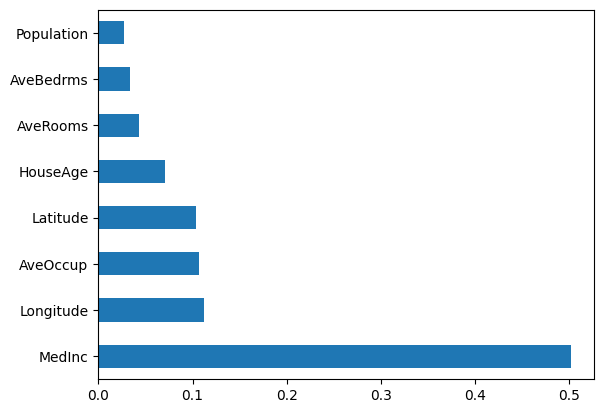

In [71]:
#plot graph of feature improtances for better visualization

feature_importances=pd.Series(model.feature_importances_,index=X.columns)

# model.feature_importances_ (배열인 상태)에 /X의 인덱스를 붙여서 /pandas series 로 만듦.
# 이렇게 하는 이유는 컬럼에 이름을 붙여주기 위함.



feature_importances.nlargest(10).plot(kind='barh')
# 위의 만든 series로 / .nlargest(10) 상위 10개 중요도값을 내림차순으로 /
# 가로막대그래프 (bar+horizon)



1번 - selectKBest 방법과 / 2번 ExtraTreeRegressor를 이용한 model.feature_importances_ 방법 모두 MedInc(중간 소득)을 ca 집값 예측에 가장 중요한 요소로 뽑음.

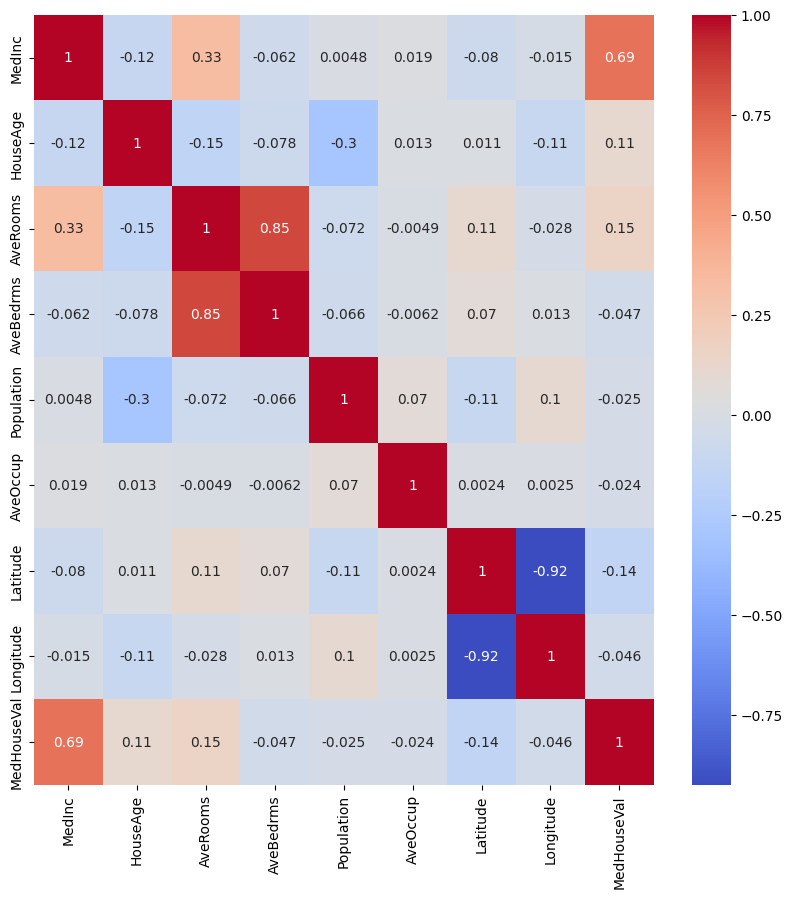

In [87]:
##3 correlation Matrix with Heatmap

# 판다스 라이브러리 사용할 때 쓰는 코드.
# df의 상관 관계 행렬을 계산함.
corrmat=df.corr()

top_corr_features=corrmat.index


plt.figure(figsize=(10,10)) #사이즈 조절
# figure = 새로운 figure 객체를 만듦 by matplotlib
# "그 다음에 나오는 plot() 류 명령은 모두" 이 figure 에 포함됨.

g=sns.heatmap(corrmat, annot=True, cmap="coolwarm")
# df[top_corr_features].corr() 는 / df 의 top_corr_features라는 칼럼에
# corrmat.index 정보를 불러오는거임.
# seaborn 의 heatmap
# annot 은 각 칸에 숫자가 표시 되냐 안되냐 True/False
# cmap 은 컬러 맵이고 RdYlGn => red yellow green 라는 뜻.


#
# sns.heatmap(corrmat, annot=True, cmap='coolwarm')
# plt.show()



correlation Matrix Heatmap

각 피쳐간의 상관 관계를 0~1 사이 값으로 나타내고 색으로 시각화환 것.

양의 상관 관계 : 한쪽이 커지면 다른 것도 커짐.

음의 상관관계 : 반비례 관계

대각선-> 항상 자기 자신과의 상관관계임.

예를 들어 히트맵에서 어떤 두 변수 간의 값이 0.90 이라면 두 피처가 매우 비슷한 정보를 닮고 잇따는 것.

"비 슷 하 다 "



plt.figure() → “도화지 하나 펼쳐!”

plot() → “그 위에 선/막대/산점도 그려!”

plt.show() → “그린 거 보여줘!”



코드	설명
plt.plot() → plt.show()	✔️ 사용 가능! 암묵적 figure 자동 생성
plt.figure() → plt.plot() → plt.show()	✔️ 명시적 제어 (크기 조절, 여러 그래프 등 가능)



즉, 도화지 (figure)에 대한 옵션 변경이 필요한 경우 plt.figure 호출하는거고 옵션 변경할 필요 없으면 굳이 figure 호출 안해도됨.